In [6]:
import pyabf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xlsxwriter as xls

In [22]:
data_folder =
DAY = "2021_10_15"  # Manually change
iv_file_ids = ['16', '18', '20', '22', '24', '26', '28']  # Manually change
iv_files = [DAY + "_00{}".format(value) for value in iv_file_ids]

In [23]:
def c1_Vm(sweep_Y_data, c1):
    """Returns the Vm at the cursor 1 position.

    Keyword arguments:
    sweep_Y_data -- sweep Vm values
    c1 -- cursor 1 position in ms
    """
    return sweep_Y_data[c1]


def sweep_command(abf_data):
    """Accesses the command epoch table in abf_data (current steps in pA),
    returns a list of current injections of the first 5 sweeps."""
    # Each current step decreases by 1/4 of the initial step
    multiplier = [1, 0.75, 0.5, 0.25, 0]
    # Epochs.level index 2 gives the value of the initial command current
    current_injection = abf.sweepEpochs.levels[2]
    return [current_injection * x / 1000 for x in multiplier]  # /1000 to get nA


def c1c2_min(sweep_Y_data, c1, c2):
    """Returns the lowest point between cursor 1 and 2.

    Keyword arguments:
    sweep_Y_data -- sweep Vm values
    c1 -- cursor 1 position in ms
    c2 -- cursor 2 position in ms
    """
    return min(sweep_Y_data[c1:c2])


def c3c4_min(sweep_Y_data, c3, c4):
    """Returns the lowest point between cursor 3 and 4.

    Keyword arguments:
    sweep_Y_data -- sweep Vm values
    c3 -- cursor 3 position in ms
    c4 -- cursor 4 position in ms
    """
    return min(sweep_Y_data[c3:c4])

In [25]:
cursor_1 = 298  # Cursor position in ms. Values obtained from Excel.
cursor_2 = 4181
cursor_3 = 8912
cursor_4 = 10747

for count, iv_file_name in enumerate(iv_files):
    path = data_folder + DAY + "/" + iv_file_name + ".abf"
    abf = pyabf.ABF(path)  # One IV file

    rmp = []
    current_injection = sweep_command(abf)
    ih = []
    ss = []
    space = [""] * 5
    for i in range(5):
        abf.setSweep(i)

        rmp.append(c1_Vm(abf.sweepY, cursor_1))
        ih.append(c1c2_min(abf.sweepY, cursor_1, cursor_2))
        ss.append(c3c4_min(abf.sweepY, cursor_3, cursor_4))
    results = [rmp, current_injection, ih, ss, space]

    workbook = xlsxwriter.Workbook(
        "C:/Users/abdij/OneDrive - University of Warwick/Desktop/ATF data/Results_copy.xlsx"
    )
    worksheet = workbook.add_worksheet()
    row = 0
    for col, data in enumerate(results):
        worksheet.write_column(row, col, data)
    workbook.close()
print(iv_file_name)


2021_10_15_0028


## Plots

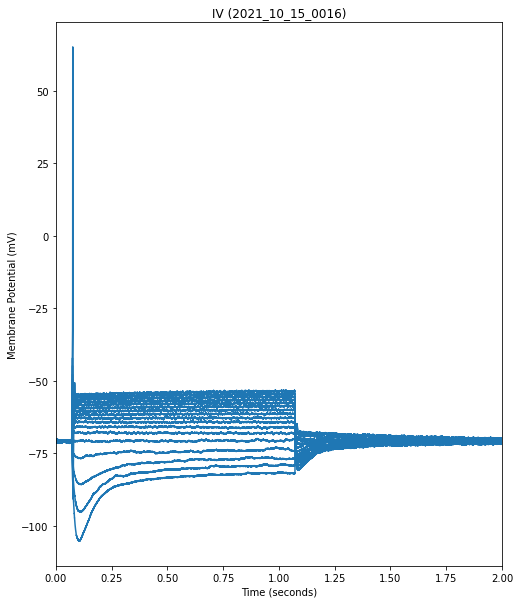

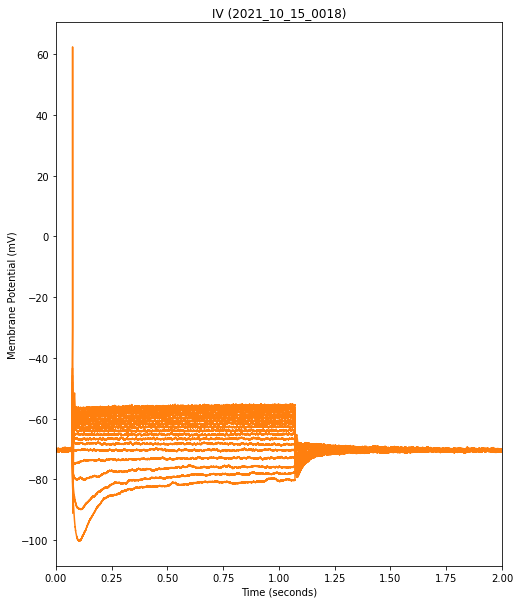

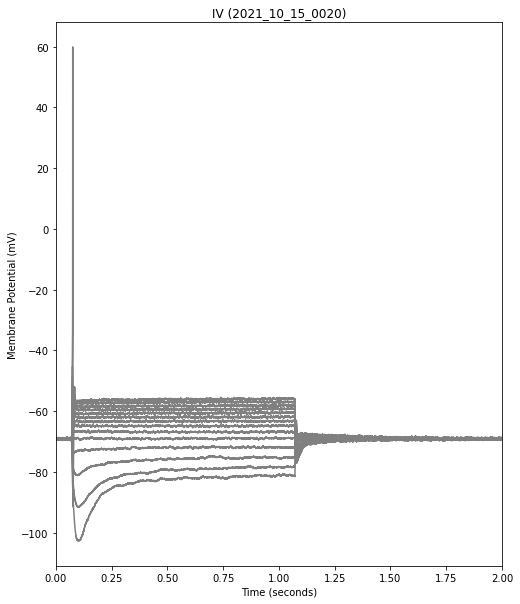

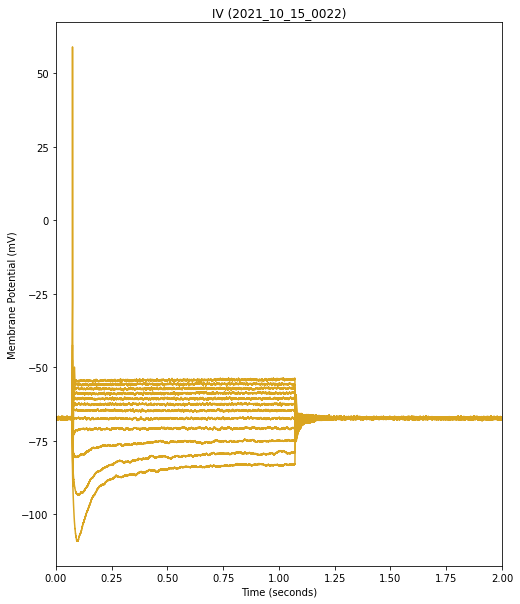

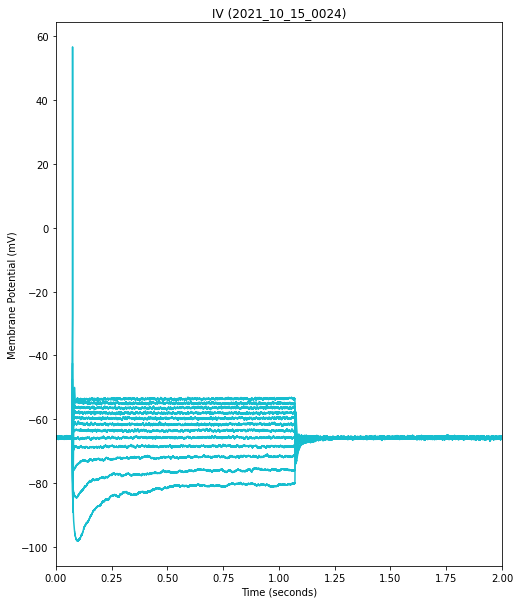

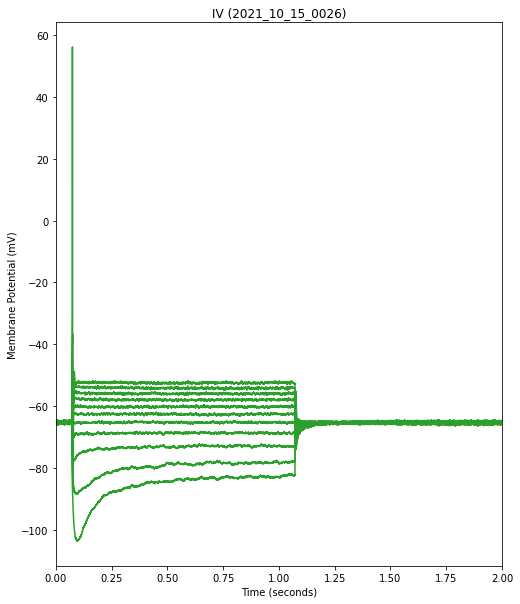

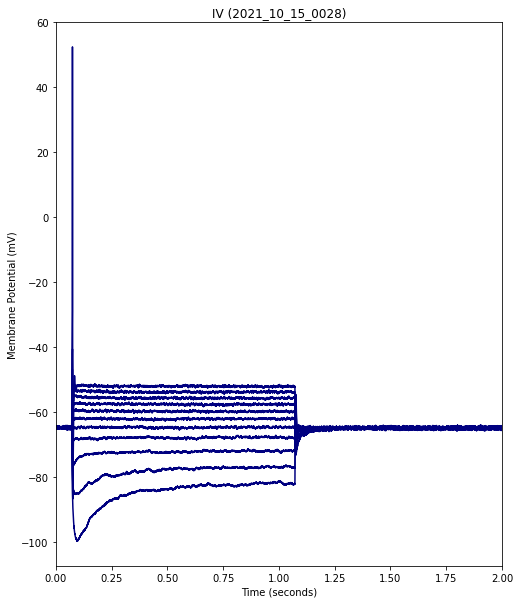

In [30]:
#  use a custom colourmap to create a different colour for every sweep
#  add name of colourmap in: cmap = mpl.cm."HERE" (e.g. viridis,winter,rainbow,magma,BuGn,tab10,cividis)
#  cmap = colourmap as a matrix of colours and then select a part of this matrix as your new colourmap

#cmap = mpl.cm.tab10(np.linspace(0, 1, 20))
#cmap = mpl.colors.ListedColormap(cmap[0:, :-1])  # change first iv_file_name from 0-19
#colours = [cmap(x / len(iv_files)) for x in abf.sweepList]
#colours.reverse()

colours = [
    "tab:blue",
    "tab:orange",
    "grey",
    "goldenrod",
    "tab:cyan",
    "tab:green",
    "navy",
]
for count, iv_file_name in enumerate(iv_files):
    path = data_folder + DAY + "/" + iv_file_name + ".abf"
    abf = pyabf.ABF(path)

    fig = plt.figure(figsize=(8, 10))
    single_colour = colours[count]

    plt.title("IV ({})".format(iv_file_name))
    plt.ylabel(abf.sweepLabelY)
    plt.xlabel(abf.sweepLabelX)

    for i in range(abf.sweepCount):
        abf.setSweep(i)
        plt.plot(
            abf.sweepX,
            abf.sweepY,
            alpha=1,
            # label="sweep {}".format(i + 1),
            color=single_colour,
        )
    plt.xlim([0, 2])
    # plt.legend()

    plt.savefig(data_folder + DAY + "/" + "IV " + iv_file_name, dpi=300, bbox_inches="tight")
    plt.show()